# EAGLE halo spin-M200 

In [1]:
import numpy as np

halo=np.load("/home/heyi/galaxy_spin_code/HeYi/spin_mass/revised_version/halo_pos_J_mass.npy")#import EAGLE halo_spin M200 

#import the enviroment of eagle 
N=256
#showG=np.load("/data/dell5/userdir/heyi/Eaglecic/Rs1.6threshold0.4fil_256_1.npy")
#w=np.load("/data/dell5/userdir/heyi/Eaglecic/Rs1.6threshold0.4w_256_1.npy")
#v=np.load("/data/dell5/userdir/heyi/Eaglecic/Rs1.6threshold0.4v_256_1.npy")
#showG=showG.reshape(N,N,N)


w=np.load('/data/dell5/userdir/hy/EAGLE_NEXUSw_256_Rs1.25_th0.25_200915.npy')
v=np.load('/data/dell5/userdir/hy/EAGLE_NEXUSv_256_Rs1.25_th0.25_200915.npy')  
showG=np.load('/data/dell5/userdir/hy/EAGLE_NEXUSfil_256_Rs1.25_th0.25_200915.npy')
showG=showG.reshape(N,N,N)
H=68/N
halo['Pos']=halo['Pos']/H #transfer position to 256 grid


In [2]:
from costhetaa import costhetaa
massx=np.arange(1,4,0.5)# M200,per unit 10**10Msun
masstest3=10**massx

y,error=costhetaa(masstest3,showG,w,v,halo)

0
0.49141680018310824
1
0.6383510306058713
2
0.7996794871794872
3
0.5260869565217391
4
0.1518987341772152


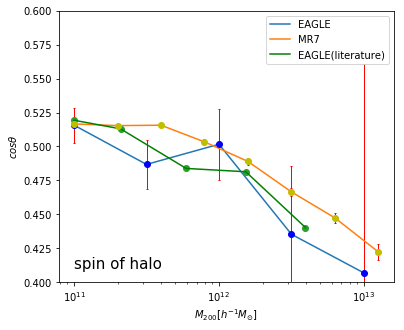

In [3]:
import matplotlib.pyplot as plt
a=np.ones([len(masstest3)])*1e10
x=(masstest3)*a
%matplotlib inline
fig,ax= plt.subplots(figsize=(6,5))

#result from literature
xpaperh=[100000000000,
209405292741.15216,
593830570568.5103,
1531740463702.0862,
3951007180206.442]
ypaperh=[0.519298245614035,
0.5129824561403509,
0.483859649122807,
0.48140350877192983,
0.44035087719298244]
#result from MR7
ymr7hms=[0.51660188, 0.51536517, 0.5156613 , 0.50338663, 0.48898015,
       0.4665769 , 0.44744973, 0.42237055, 0.        ]
errormr7hms=[0.0009698 , 0.00128984, 0.00168864, 0.00215303, 0.00267862,
       0.00324237, 0.00393313, 0.00587922, 0.        ]
massx1=np.arange(1,3.5,0.3)
masstest31=10**massx1
a1=np.ones([len(masstest31)])*10e9
xmr7hms=masstest31*a1

plt.plot(x[0:-1],y[0:-1],label='EAGLE')
plt.plot(xmr7hms[0:-1],ymr7hms[0:-1],label='MR7')
plt.plot(xpaperh,ypaperh,'o')
plt.plot(xpaperh,ypaperh,'-',color='g',label='EAGLE(literature)')
ax.set_xscale('log')

plt.ylim([0.40,0.60])
plt.errorbar(x[0:-1],y[0:-1],yerr=error[0:-1],fmt='o',ecolor='r',color='b',elinewidth=1,capsize=1)
plt.errorbar(xmr7hms[0:-1],ymr7hms[0:-1],yerr=errormr7hms[0:-1],fmt='o',ecolor='r',color='y',elinewidth=1,capsize=1)

plt.legend(loc='upper right')
plt.xlabel("$M_{200} [h^{-1}M_{\odot}$]")
plt.ylabel("$cos{\\theta}$")
plt.text(x[0], 0.41, 'spin of halo',size=15)
plt.show()

# EAGLE halo spin-stellarmass

In [4]:
starmass=np.load("/home/heyi/galaxy_spin_code/HeYi/spin_mass/revised_version/starmass.npy")
halo["Mass"]=starmass

0
0.5158934707903781
1
0.5614035087719298
2
0.6404199475065617
3
0.7559943582510579
4
0.7014084507042253
5
0.2605042016806723
6
0.08333333333333333


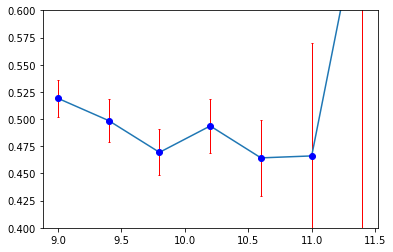

In [5]:
massx=np.arange(-1,2,0.4)
masstest2=10**massx
y,error=costhetaa(masstest2,showG,w,v,halo)

In [6]:
ymr7gms=[0.51435667, 0.51638658, 0.50598455, 0.48173168, 0.        ]
errormr7gms=[0.00097574, 0.00115895, 0.00120932, 0.00157166, 0.        ]
massx1=np.arange(-1,1.5,0.6)
masstest31=10**massx1
a1=np.ones([len(masstest31)])*10e9
xmr7gms=masstest31*a1



Text(0,0.5,'$cos{\\theta}$')

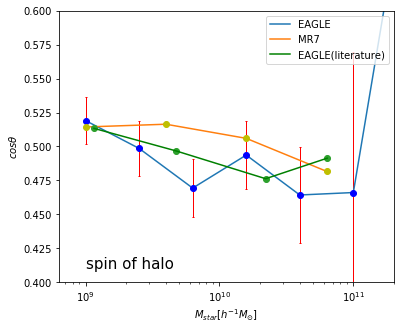

In [7]:
a=np.ones([len(masstest2)])*10e9
x=masstest2*a
fig,ax= plt.subplots(figsize=(6,5))
#xmr7gm=np.ones([len(ymr7gm)])*10e9*10**np.arange(-1,1.5,0.4)
plt.plot(x[0:-1],y[0:-1],label='EAGLE')
plt.plot(xmr7gms[0:-1],ymr7gms[0:-1],label='MR7')
#论文的图：
xpaperg=[1155361176.8818622,
4741963296.520797,
22128283925.878925,
63808428501.175964]
ypaperg=[0.5133333333333334,
0.49674074074074076,
0.47629629629629633,
0.4914074074074074]

plt.plot(xpaperg,ypaperg,'o')


ax.set_xscale('log')
#plt.xscale("log")
plt.ylim([0.4,0.60])
plt.xlim([10**8.8,2*1e11])
#plt.xlim([x[0],x[-1]])
#ax.set_yscale('log')
#plt.title("eagle_galaxy_spin*$v_f$ Rs=1.36Mpc/h Threshold=0.7 ")
plt.plot(xpaperg,ypaperg,'-',color='g',label='EAGLE(literature)')
plt.errorbar(x,y,yerr=error,fmt='o',ecolor='r',color='b',elinewidth=1,capsize=1)
plt.errorbar(xmr7gms[0:-1],ymr7gms[0:-1],yerr=errormr7gms[0:-1],fmt='o',ecolor='r',color='y',elinewidth=1,capsize=1)
plt.text(x[0], 0.41, 'spin of halo',size=15)
plt.legend(loc='upper right')
plt.xlabel("$M_{star} [h^{-1}M_{\odot}$]")
plt.ylabel("$cos{\\theta}$")

In [27]:
test["Spin"]

array([[-2.60381363e+09,  4.00426982e+09,  2.85325152e+08],
       [-3.59533978e+09, -4.68710400e+09, -5.56331072e+08],
       [ 1.03032984e+08, -4.91918304e+08,  5.15599840e+08],
       [-3.02223904e+08,  9.57056896e+08, -3.59142200e+07],
       [-1.22103846e+09, -6.66649600e+08,  6.30754304e+08],
       [-2.38943258e+09, -2.23746420e+07, -5.63256640e+08],
       [-1.63822150e+07,  1.18281024e+09, -8.65154880e+08],
       [-2.11908320e+08, -3.22850140e+07,  6.04819640e+07],
       [-1.14347792e+08, -2.38186416e+08,  1.08582592e+08],
       [ 2.18280800e+08,  4.39709952e+08, -1.20466376e+08]], dtype=float32)